In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read in the three datasets
#NYbestlist is the NY times best seller list
#weeks_on_list is the number of weeks a book was on the best seller list
NYbestlist_df = pd.read_csv("Resources/books_uniq_weeks.csv",encoding = 'unicode_escape')
NYbestlist_df['date'] = pd.to_datetime(NYbestlist_df['date'])
NYbestlist_df['year'] = NYbestlist_df['date'].dt.year
NYbestlist_df['month'] = NYbestlist_df['date'].dt.month
NYbestlist_df.head()


,publisher,author,primary_isbn10,primary_isbn13,date,contributor,title,weeks_on_list,year,month
0,Riverhead,Paula Hawkins,1594634025,9.78E+12,2017-02-19,by Paula Hawkins,THE GIRL ON THE TRAIN,102,2017,2
1,Scribner,Anthony Doerr,1501173219,9.78E+12,2017-05-07,by Anthony Doerr,ALL THE LIGHT WE CANNOT SEE,81,2017,5
2,Vintage,E L James,525431888,9.78E+12,2017-03-05,by E. L. James,FIFTY SHADES DARKER,66,2017,3
3,St. Martin's,Kristin Hannah,1466850604,9.78E+12,2017-10-29,by Kristin Hannah,THE NIGHTINGALE,63,2017,10
4,Penguin Group,Kathryn Stockett,1440697663,9.78E+12,2012-04-08,by Kathryn Stockett,THE HELP,58,2012,4


In [4]:
NYbestlist_df.columns

Index(['publisher', 'author', 'primary_isbn10', 'primary_isbn13', 'date',
       'contributor', 'title', 'weeks_on_list', 'year', 'month'],
      dtype='object')

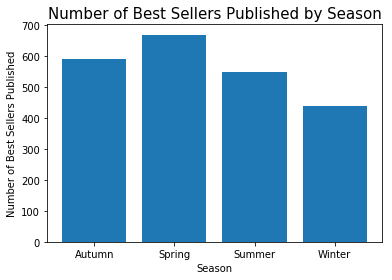

In [5]:
nyseasons = []
for x in NYbestlist_df["month"]:
    if x == 1 or x == 2 or x == 12:
        nyseasons.append("Winter")
        
    if x == 3 or x == 4 or x == 5:
        nyseasons.append("Spring")
        
    if x == 6 or x == 7 or x == 8:
        nyseasons.append("Summer")
    
    if x == 9 or x == 10 or x == 11:
        nyseasons.append("Autumn")
        
NYbestlist_df["Seasons"] = nyseasons
seasonpublish = NYbestlist_df.groupby("Seasons")["Seasons"].count().to_dict()
publish = seasonpublish.keys()
numpublish = seasonpublish.values()
plt.bar(publish,numpublish)
plt.xlabel("Season")
plt.ylabel("Number of Best Sellers Published")
plt.title("Number of Best Sellers Published by Season", size = 15)
plt.savefig("graphs/NYbestseller_by_season.png")

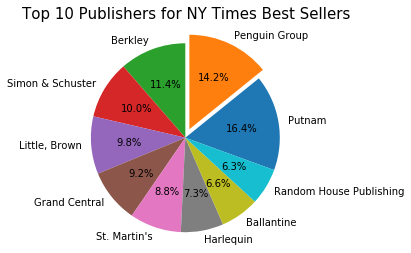

In [6]:
nybestpublisher = NYbestlist_df.groupby("publisher")["publisher"].count().sort_values(ascending = False)
top10nypub = nybestpublisher[0:10].to_dict()
top10name = top10nypub.keys()
top10pubnum = top10nypub.values()
explode = [0,0.1,0,0,0,0,0,0,0,0]
plt.pie(top10pubnum, labels = top10name,autopct="%1.1f%%", startangle=-20,explode = explode)
top10nypub
plt.axis("equal")
plt.title("Top 10 Publishers for NY Times Best Sellers", size = 15)
plt.savefig("graphs/Top10_NYpublishers_penguin.png")

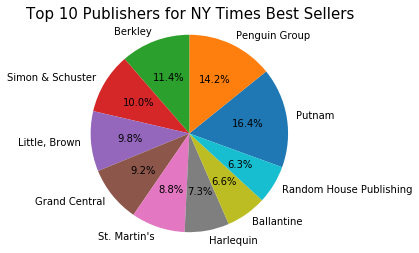

In [7]:
explode = [0,0,0,0,0,0,0,0,0,0]
plt.pie(top10pubnum, labels = top10name,autopct="%1.1f%%", startangle=-20,explode = explode)
top10nypub
plt.axis("equal")
plt.title("Top 10 Publishers for NY Times Best Sellers", size = 15)
plt.savefig("graphs/Top10_NYpublishers.png")

In [8]:
#goodreads is the Goodreads dataset
#rating of 5 
goodreads_df = pd.read_csv('Resources/books.csv',error_bad_lines=False)
goodreads_df.head()


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [30]:
#top100 is the top 100 books from 1998-2010
#Volume is how many books were sold which is a great thing to potentially track
#Nielsen records 1998-2010
top100_df = pd.read_csv('Resources/Top 100 books - TOP 100 - ALL TIME.csv')

#convert values from pounds to dollars
#remove pound sign
top100_df["Value"] = [x.strip('£') for x in top100_df["Value"]]
top100_df["RRP"] = [x.strip('£') for x in top100_df["RRP"]]
top100_df["ASP"] = [x.strip('£') for x in top100_df["ASP"]]
top100_df["Title"] = [x.strip('#') for x in top100_df["Title"]]
#convert str to float
top100_df["Value"] = [float(x.replace(',','')) for x in top100_df["Value"]]
top100_df["Value"] = pd.to_numeric(top100_df["Value"])
top100_df["RRP"] = pd.to_numeric(top100_df["RRP"])
top100_df["ASP"] = pd.to_numeric(top100_df["ASP"])
top100_df["Volume"] = [float(x.replace(',','')) for x in top100_df["Volume"]]
top100_df["Volume"] = pd.to_numeric(top100_df["Volume"])

#convert to dollars
top100_df["Value"] = [x*1.22 for x in top100_df["Value"]]
top100_df["RRP"] = [x*1.22 for x in top100_df["RRP"]]
top100_df["ASP"] = [x*1.22 for x in top100_df["ASP"]]

#extract months and year
top100_df["Publ Date"] = pd.to_datetime(top100_df['Publ Date'])
top100_df['year'] = top100_df['Publ Date'].dt.year
top100_df['month'] = top100_df['Publ Date'].dt.month
top100_df.head()

,Index,Position,ISBN,Title,Author,Imprint,Publisher Group,Volume,Value,RRP,ASP,Binding,Publ Date,Product Class,year,month
0,1,1,9.780550e+12,"Da Vinci Code,The","Brown, Dan",Corgi Books,Transworld Grp,4522025.0,2.788656e+07,9.7478,6.1610,Paperback,2004-03-01,"F2.1 Crime, Thriller & Adventure",2004,3
1,3,2,9.780750e+12,Harry Potter and the Philosopher's Stone,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,3844316.0,2.422089e+07,8.5278,6.3684,Paperback,1997-06-26,Y2.1 Children's Fiction,1997,6
2,7,3,9.780750e+12,Harry Potter and the Chamber of Secrets,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,3184492.0,1.979331e+07,8.5278,6.1854,Paperback,1999-04-01,Y2.1 Children's Fiction,1999,4
3,6,4,9.780550e+12,Angels and Demons,"Brown, Dan",Corgi Books,Transworld Grp,3096850.0,1.895554e+07,9.7478,6.1610,Paperback,2003-07-01,"F2.1 Crime, Thriller & Adventure",2003,7
4,2,5,9.780750e+12,Harry Potter and the Order of the Phoenix,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,3043226.0,4.138903e+07,20.7278,13.6030,Hardback,2003-06-21,Y2.1 Children's Fiction,2003,6


In [35]:
# Calculate book_category Percents
book_category_count = top100_df["Product Class"].value_counts().sort_values(ascending = False)
book_category_count

General & Literary Fiction           31
Crime, Thriller & Adventure          14
Children's Fiction                   10
Food & Drink                          9
Young Adult Fiction                   8
Autobiography                         8
Fitness & Diet                        3
Science Fiction & Fantasy             2
Puzzle & Picture Books                2
Humor, Trivia & Quiz Books            2
Travel Writing                        2
Encyclopedias & General Reference     2
Popular Science                       2
Pre-school & Early Learning           1
Current Affairs & Issues              1
General Transport                     1
Hobbies, Pastimes & Indoor Games      1
Usage & Writing Guides                1
Name: Product Class, dtype: int64

In [32]:
top100_df = top100_df.replace(
    {'F1.1  General & Literary Fiction': "General & Literary Fiction",
     'F2.1  Crime, Thriller & Adventure': "Crime, Thriller & Adventure",
     "Y2.1  Children's Fiction": "Children's Fiction",
     "Y2.2  Young Adult Fiction": "Young Adult Fiction",
        'T4.1A  Autobiography:  The Arts': "Autobiography", 
     'T4.0A  Autobiography: General': "Autobiography",
     'T4.1  Biography: The Arts': "Autobiography",
     "T4.2A  Autobiography: Historical, Political & Military": "Autobiography",
    'T16.1  National & Regional Cuisine': "Food & Drink",
     'T16.0  Food & Drink: General': "Food & Drink",
     "T9.4  Fitness & Diet":"Fitness & Diet",
     "T8.5  Travel Writing":"Travel Writing",
     "T2.0  Encyclopedias & General Reference":"Encyclopedias & General Reference",
     "T8.0  Popular Science":"Popular Science",
     "F2.2  Science Fiction & Fantasy": "Science Fiction & Fantasy",
     "T2.1  Usage & Writing Guides":"Usage & Writing Guides",
     "T13.0  Humour: Collections & General": "Humor, Trivia & Quiz Books",
     "T13.3  Trivia & Quiz Books": "Humor, Trivia & Quiz Books",
     "Y1.3  Picture Books":"Puzzle & Picture Books",
     "T13.4  Puzzles": "Puzzle & Picture Books",
     "T11.5  Hobbies, Pastimes & Indoor Games": "Hobbies, Pastimes & Indoor Games",
     "Y1.1  Pre-school & Early Learning":"Pre-school & Early Learning",
     "T7.5  Current Affairs & Issues":"Current Affairs & Issues",
     "T12.0  Transport: General":"General Transport"
    })
top100_df["Product Class"].value_counts()

General & Literary Fiction           31
Crime, Thriller & Adventure          14
Children's Fiction                   10
Food & Drink                          9
Young Adult Fiction                   8
Autobiography                         8
Fitness & Diet                        3
Science Fiction & Fantasy             2
Puzzle & Picture Books                2
Humor, Trivia & Quiz Books            2
Travel Writing                        2
Encyclopedias & General Reference     2
Popular Science                       2
Current Affairs & Issues              1
General Transport                     1
Hobbies, Pastimes & Indoor Games      1
Pre-school & Early Learning           1
Usage & Writing Guides                1
Name: Product Class, dtype: int64

In [37]:
book_category10 = book_category_count[0:10].to_dict()
book_category10

{'General & Literary Fiction': 31,
 'Crime, Thriller & Adventure': 14,
 "Children's Fiction": 10,
 'Food & Drink': 9,
 'Young Adult Fiction': 8,
 'Autobiography': 8,
 'Fitness & Diet': 3,
 'Science Fiction & Fantasy': 2,
 'Puzzle & Picture Books': 2,
 'Humor, Trivia & Quiz Books': 2}

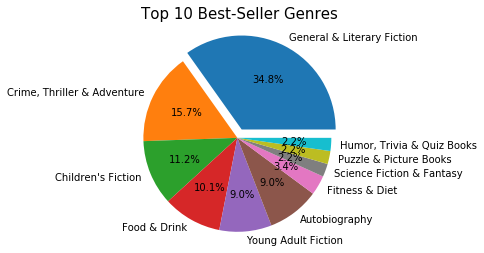

In [38]:
sizes = book_category10.values()
labels = book_category10.keys()
explode = [0.1,0,0,0,0,0,0,0,0,0]
colors = None
# Build Pie Chart
plt.pie(sizes, colors=None, startangle=0, autopct="%1.1f%%", explode = explode, labels=labels )
plt.axis('equal')
plt.title('Top 10 Best-Seller Genres', fontsize=15)
# Save Figure
plt.savefig('graphs/book_category.png')
# Show Figure
plt.show()

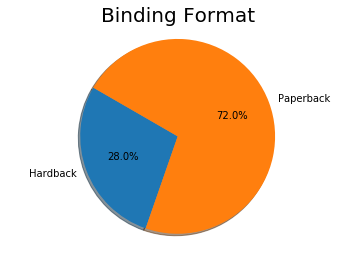

In [41]:
#Binding Format ( paperback vs hardcover ) pie chart
binding_format = top100_df.groupby("Binding")["Binding"].count().to_dict()
sizes = binding_format.values()
labels = binding_format.keys()
colors = None
# Build Pie Chart
plt.pie(sizes, labels=labels, colors=None, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Binding Format', fontsize=20)
# Save Figure
plt.savefig('graphs/binding_format.png')
# Show Figure
plt.show()

In [23]:
top100_df.columns

Index(['Index', 'Position', 'ISBN', 'Title', 'Author', 'Imprint',
       'Publisher Group', 'Volume', 'Value', 'RRP', 'ASP', 'Binding',
       'Publ Date', 'Product Class', 'year', 'month', 'Price Category',
       'Retail Price Category', 'Season'],
      dtype='object')

In [12]:
bestauthor = top100_df.groupby("Author")["Author"].count().sort_values(ascending=False)
top10author = bestauthor[0:10]
top10author

Author
Rowling, J. K.      12
Brown, Dan           6
Oliver, Jamie        6
Meyer, Stephenie     4
Pullman, Philip      3
Bryson, Bill         3
Larsson, Stieg       3
Smith, Delia         2
Clarkson, Jeremy     2
Hosseini, Khaled     2
Name: Author, dtype: int64

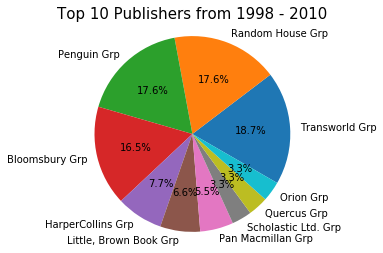

In [13]:
bestpublisher = top100_df.groupby("Publisher Group")["Publisher Group"].count().sort_values(ascending = False)
top10pub = bestpublisher[0:10].to_dict()
top10pubname = top10pub.keys()
top10percent = top10pub.values()
explode = [0,0,0,0,0,0,0,0,0,0]
plt.pie(top10percent, labels = top10pubname,autopct="%1.1f%%", startangle=-30,explode = explode)
plt.title("Top 10 Publishers from 1998 - 2010", size = 15)
plt.axis("equal")
plt.savefig("graphs/Top10_historicalpublishers.png")

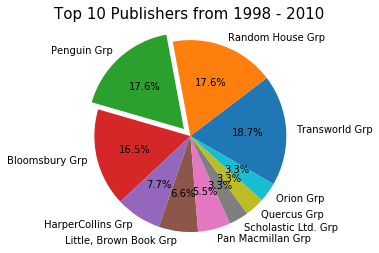

In [14]:
explode = [0,0,0.1,0,0,0,0,0,0,0]
plt.pie(top10percent, labels = top10pubname,autopct="%1.1f%%", startangle=-30,explode = explode)
plt.title("Top 10 Publishers from 1998 - 2010", size = 15)
plt.axis("equal")
plt.savefig("graphs/Top10_historicalpublishers_penguin.png")

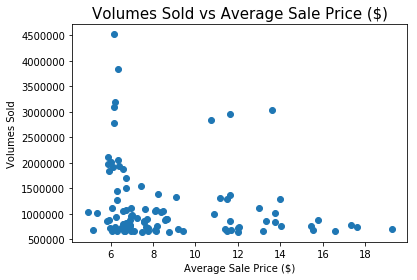

In [15]:
volumes = top100_df["Volume"]
saleprice = top100_df["ASP"]
plt.scatter(saleprice,volumes)
plt.title("Volumes Sold vs Average Sale Price ($)", size = 15)
plt.xlabel("Average Sale Price ($)")
plt.ylabel("Volumes Sold")
plt.savefig("graphs/Volumes_vs_averageprice.png")

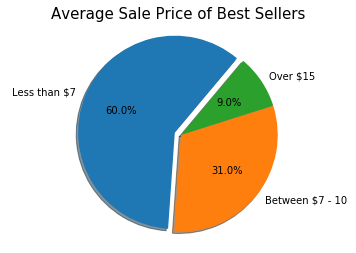

In [16]:
bins = [0,6,9,20]
labels = ["Less than $7","Between $7 - 10", "Over $15"]
explode = [0.07, 0 ,0]
top100_df["Price Category"] = pd.cut(top100_df["ASP"],bins,labels=labels)
price = top100_df["Price Category"].value_counts()
plt.pie(price, labels=labels,shadow=True, startangle=50, autopct="%1.1f%%", explode = explode)
plt.axis('equal')
plt.title("Average Sale Price of Best Sellers", size = 15)
plt.savefig("graphs/Average_sale_price.png")

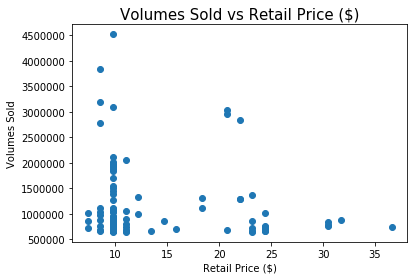

In [17]:
retailprice = top100_df["RRP"]
plt.scatter(retailprice,volumes)
plt.title("Volumes Sold vs Retail Price ($)", size = 15)
plt.xlabel("Retail Price ($)")
plt.ylabel("Volumes Sold")
plt.savefig("graphs/Volumes_sold_vs_retailprice.png")

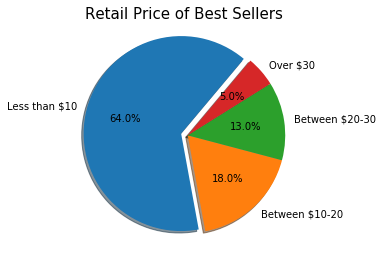

In [18]:
bins = [0,9,19,29,39]
labels = ["Less than $10", "Between $10-20","Between $20-30","Over $30"]
explode = [0.07, 0 ,0,0]
top100_df["Retail Price Category"] = pd.cut(top100_df["RRP"],bins,labels=labels)
rprice = top100_df["Retail Price Category"].value_counts()
plt.pie(rprice, labels=labels,shadow=True, startangle=50, autopct="%1.1f%%", explode = explode)
plt.axis('equal')
plt.title("Retail Price of Best Sellers", size = 15)
plt.savefig("graphs/Retailpricepercent.png")

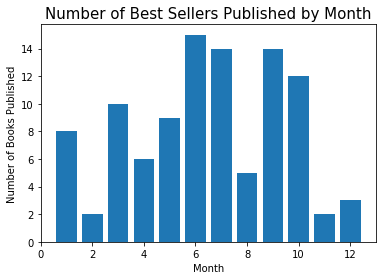

In [19]:
months = top100_df.groupby('month')['month'].count().to_dict()
month = months.keys()
sales = months.values()
plt.bar(month,sales)
plt.xlabel("Month")
plt.ylabel("Number of Books Published")
plt.title("Number of Best Sellers Published by Month", size = 15)
plt.savefig("graphs/top100publish_by_month.png")

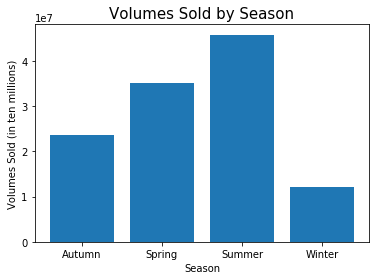

In [20]:
#separate months into seasons
seasons = []
nummonth = top100_df["month"]
for x in nummonth:
    if x == 1 or x == 2 or x == 12:
        seasons.append("Winter")
        
    if x == 3 or x == 4 or x == 5:
        seasons.append("Spring")
        
    if x == 6 or x == 7 or x == 8:
        seasons.append("Summer")
    
    if x == 9 or x == 10 or x == 11:
        seasons.append("Autumn")

top100_df["Season"] = seasons

#volumes sold by season
salesbyseason = top100_df.groupby("Season")["Volume"].sum().to_dict()
vsales = salesbyseason.values()
season = salesbyseason.keys()
plt.bar(season,vsales)
plt.xlabel("Season")
plt.ylabel("Volumes Sold (in ten millions)")
plt.title("Volumes Sold by Season", size = 15)
plt.savefig("graphs/Volumes_sold_per_season.png")

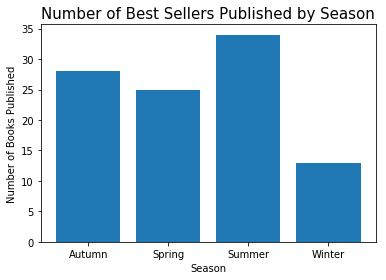

In [21]:
#publish date by season
pubbyseason = top100_df.groupby("Season")["Volume"].count()
plt.bar(season,pubbyseason)
plt.ylabel("Number of Books Published")
plt.xlabel("Season")
plt.title("Number of Best Sellers Published by Season", size = 15)
plt.savefig("graphs/publishdate_per_season.png")